<h1 style="color:red">Classify The Species Of Flowers Using K-Nearest Neighbor Model</h1>
<p><b>By:</b> Mir Habeebullah Shah Quadri<br><b>Dept:</b> AI<br><b>Roll.No: </b> 18B81DA914</p>
<h4 style="color:red">Problem Statement:</h4>
<p>Apply KNN analysis on the given dataset to classify the species of given flower.</p>
<h4 style="color:blue">Solution</h4>

<p><b>Step 1:</b> Import the necessary libraries required.</p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

<p><b>Step 2:</b> Read the csv file into a pandas dataframe.</p>

In [3]:
data = pd.read_csv('iris.csv')
data.head()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


<p><b>Step 3:</b> List out the features of the dataset.</p>

In [4]:
list(data.columns)

['Id', 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

<p><b>Step 4:</b> Find out the basic description (i.e, mean, count, standard deviation, etc.), for each feature in the dataset.</p>

In [40]:
data.describe()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<p><b>Step 5:</b> List out the different species in the dataset along with their value count.</p>

In [41]:
data['Species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

<p><b>Step 6:</b> Using pair-plots, analyze the similarities and dissimilarities between the different species in terms of their features.</p>

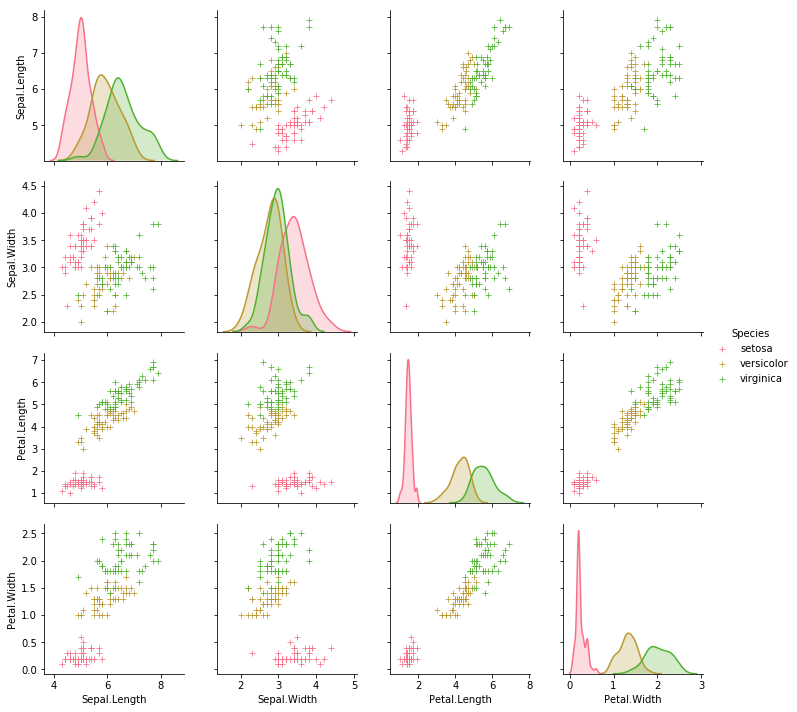

In [44]:
tmp = data.drop('Id', axis = 1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

<p>From the pair-plots above, we can see that the iris-setosa (pink) is distinctly different from the other two types of flowers, whereas there is some overlap between iris-versicolor and iris-virginica.</p>

<p><b>Step 7:</b> Drop the 'Id' and 'Species' features from the dataset and save the 'Species' feature in a seperate variable y.</p>

In [50]:
X = data.drop(['Id', 'Species'], axis = 1)
y = data['Species']

<p><b>Step 8:</b> Divide the dataset into training and testing data by the ratio of 70/30.</p>

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

<p><b>Step 9:</b> The first thing that needs to be done is to find the right 'K' value for the analysis. We will do this by fitting the KNN model with 'K' values in the range of 1 to 26 to see which 'K' values perform better in terms of their accuracy of predictions. Then we will visualize the results.</p>

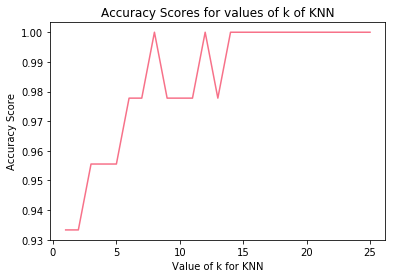

In [53]:
k_range = list(range(1,26))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for values of k of KNN')
plt.show()

<p>From the above visualization, we could conclude that <b>K = 12</b> would be a good choice for classification.</p>

<p><b>Step 10:</b> Fit the model with K = 12. Then create a vector array with values for each feature (sepal_width, sepal_height, etc.) for a given flower and test if the model can classify it correctly.</p>

In [55]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X,y)
knn.predict([[6,3,4,2]])

array(['versicolor'], dtype=object)

<p>For the given vector array of flower, the model has classified the flower correctly as <b>Versicolor.</b></p>